<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 3*

# 📝 Assignment
---

# Ridge Regression

이번 모듈에서 배운 내용을 조금 다른 데이터를 통해 복습해 봅시다. 데이터에 대한 정보는 다음 링크를 참조해 주세요.

- [Melbourne Housing Market]('https://www.kaggle.com/anthonypino/melbourne-housing-market')

이번에도 Price 변수를 target으로 정하고 모델을 구성해 봅시다.

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

# get data
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/melbourne_house_prices/MELBOURNE_HOUSE_PRICES_LESS.csv')

# drop high cardinality cols
df.drop(columns=['Suburb','Address','SellerG','Date'], inplace=True)

# drop na values in Price
df.dropna(subset=['Price'], inplace=True)

# drop duplicated rows
df.drop_duplicates(inplace=True)



In [2]:
df.head()

,Rooms,Type,Price,Method,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,3,h,1490000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,1220000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,1420000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,1515000.0,S,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,670000.0,S,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [3]:
df.isnull().sum()

Rooms            0
Type             0
Price            0
Method           0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

### 1) 데이터의 특성을 파악하기 위해 pandas_profiling을 사용해 보세요.
- **범주형 특성으로 원핫인코딩이 꼭 필요한 특성의 갯수를 과제 제출폼에 제출하세요.**

In [4]:
### 이곳에서 과제를 진행해 주세요 ###

ProfileReport(df)

In [5]:
df.dtypes

Rooms              int64
Type              object
Price            float64
Method            object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

In [6]:
categorical = df.columns[df.dtypes == object]
categorical

Index(['Type', 'Method', 'Regionname', 'CouncilArea'], dtype='object')

In [7]:
df[categorical].head()

,Type,Method,Regionname,CouncilArea
0,h,S,Northern Metropolitan,Yarra City Council
1,h,S,Northern Metropolitan,Yarra City Council
2,h,S,Northern Metropolitan,Yarra City Council
3,h,S,Western Metropolitan,Moonee Valley City Council
4,h,S,Western Metropolitan,Moonee Valley City Council


### 2) 범주형 변수들에 대해 one-hot encoding(category_encoders)을 수행하고 데이터를 train/test 셋으로 무작위로 나누어 주세요.(train/test = 80%/20%)
- [category_encoders.one_hot.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html#one-hot), 파라미터는 use_cat_names = True 사용
- 데이터 분리는 [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn-model-selection-train-test-split) 을 사용해 주세요. 사용해야 하는 파라미터는 test_size, train_size, random_state=2 입니다. 나머지는 default 사용합니다.
- **분리된 학습데이터의 첫번째 샘플의 인덱스 값를 과제 제출폼에 제출하세요.**


In [8]:
### 이곳에서 과제를 진행해 주세요 ###
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(use_cat_names = True)
df2 = encoder.fit_transform(df)
df2

C:\Users\tkryu\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Rooms,Type_h,Type_t,Type_u,Price,Method_S,Method_SP,Method_VB,Method_PI,Method_SA,...,CouncilArea_Nillumbik Shire Council,CouncilArea_Whittlesea City Council,CouncilArea_Knox City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra Ranges Shire Council,CouncilArea_Cardinia Shire Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Mitchell Shire Council,CouncilArea_Moorabool Shire Council,CouncilArea_Murrindindi Shire Council
0,3,1,0,0,1490000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,1220000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,1420000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,1515000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,670000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63015,2,0,0,1,340000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63016,2,0,0,1,347700.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63017,3,1,0,0,808000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63018,3,1,0,0,566000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df2.columns.value_counts().sum()

55

In [10]:
df2.columns.difference(['Price']).value_counts().sum()

54

In [11]:
from sklearn.model_selection import train_test_split

X = df2[df2.columns.difference(['Price'])]
y = df2[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df2.shape)


print(X_train.index[0])

(34012, 54)
(8503, 54)
(34012, 1)
(8503, 1)
(42515, 55)
602


### 3) SelectKBest를 사용해서 20개의 특성만 selection 하세요
- score_func 에는 f_regression을 사용합니다
- **가장 스코어(Attributes: scores_ 사용)가 높게 나온 특성의 이름을 과제 제출폼에 제출하세요.**

In [12]:
### 이곳에서 과제를 진행해 주세요 ###
from sklearn.feature_selection import f_regression, SelectKBest

selector = SelectKBest(score_func=f_regression, k=20)

## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)

## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)



all_names = X_train.columns

## selector.get_support()
selected_mask = selector.get_support()

## 선택된 특성들
selected_names = all_names[selected_mask]

## 선택되지 않은 특성들
unselected_names = all_names[~selected_mask] 


C:\Users\tkryu\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [13]:
scores = selector.scores_
[scores]

[array([6.93557864e+01, 1.12726126e+03, 3.26653485e+03, 6.38039034e+02,
        2.33441563e+01, 9.74261823e+01, 7.17963601e+01, 1.38586421e+02,
        5.85208256e+01, 1.30263440e+02, 5.51647600e-02, 8.14381730e+02,
        2.12817559e+01, 3.53274926e+01, 9.93011045e+00, 1.39372210e+02,
        1.21012219e+02, 4.97108842e+01, 6.50797782e+00, 2.39754800e+02,
        1.22907811e+01, 1.20781309e+02, 8.14875758e+00, 7.37680145e+00,
        9.62941333e+01, 1.55238372e-01, 3.29476644e+01, 5.57316131e+01,
        8.72533532e+02, 2.18947243e+01, 6.37945026e+02, 4.09675454e+02,
        3.06680430e+01, 2.61352948e+01, 2.16395591e+03, 4.93153083e+01,
        2.72124035e+00, 5.48849696e+00, 3.71085374e+02, 3.13176886e+02,
        1.36396400e+00, 7.22590012e+01, 8.07361356e+01, 7.65995809e+01,
        1.13002226e+03, 9.47922718e+01, 2.12740362e+02, 5.29299145e+03,
        9.36929364e+02, 1.22890819e+02, 7.01402603e+03, 3.46397302e+03,
        9.95939585e+01, 3.60117719e+03])]

In [14]:
selected_names

Index(['CouncilArea_Bayside City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Frankston City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Melton City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council', 'Distance', 'Method_SP',
       'Method_VB', 'Regionname_Northern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Rooms', 'Type_h', 'Type_u'],
      dtype='object')

In [15]:
# 선택된 feature들의 번호와, score의 번호를 통해 feature name과 score를 매치 시킨다.
# dictionary로 만든다

selected_features = selector.fit(X_train, y_train)
selected_dict = {}
for i in selected_features.get_support(indices=True):
    selected_dict[all_names[i]] = scores[i]

selected_dict

C:\Users\tkryu\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'CouncilArea_Bayside City Council': 1127.261256505291,
 'CouncilArea_Boroondara City Council': 3266.5348462362836,
 'CouncilArea_Brimbank City Council': 638.0390344420028,
 'CouncilArea_Frankston City Council': 138.58642131180864,
 'CouncilArea_Hume City Council': 814.3817298615417,
 'CouncilArea_Manningham City Council': 139.3722095697393,
 'CouncilArea_Melton City Council': 239.75479991849977,
 'CouncilArea_Stonnington City Council': 872.5335323404521,
 'CouncilArea_Whittlesea City Council': 637.9450261189508,
 'CouncilArea_Wyndham City Council': 409.67545401359786,
 'Distance': 2163.9559073530986,
 'Method_SP': 371.0853744259934,
 'Method_VB': 313.17688577672965,
 'Regionname_Northern Metropolitan': 1130.0222593349977,
 'Regionname_South-Eastern Metropolitan': 212.74036214264737,
 'Regionname_Southern Metropolitan': 5292.991446822521,
 'Regionname_Western Metropolitan': 936.9293644907547,
 'Rooms': 7014.026027529074,
 'Type_h': 3463.9730175023624,
 'Type_u': 3601.177189070797}

In [16]:
# 보기 쉽게 데이터 프레임으로 만들고, score를 기준으로 정렬

selected_df = pd.DataFrame.from_dict(selected_dict,orient='index')
selected_df.reset_index(inplace=True)
selected_df.columns = ['feature', 'score']
selected_df.sort_values('score', ascending=False, inplace=True)
selected_df.reset_index(inplace=True, drop=True)
selected_df

,feature,score
0,Rooms,7014.026028
1,Regionname_Southern Metropolitan,5292.991447
2,Type_u,3601.177189
3,Type_h,3463.973018
4,CouncilArea_Boroondara City Council,3266.534846
5,Distance,2163.955907
6,Regionname_Northern Metropolitan,1130.022259
7,CouncilArea_Bayside City Council,1127.261257
8,Regionname_Western Metropolitan,936.929364
9,CouncilArea_Stonnington City Council,872.533532


In [17]:
# 가장 점수가 높은 feature
selected_df.iloc[0]

feature      Rooms
score      7014.03
Name: 0, dtype: object

### 4) RidgeCV를 사용해서 회귀모델을 만들어 보세요
- attribute는 normalize=True, cv=5를 사용하세요. 나머지는 default
- **alphas = [0, 0.001, 0.01, 0.1, 1] 을 시도해보고 가장 좋은 점수가 나온 alpha 값을 과제 제출폼에 제출하세요.**

In [18]:
### 이곳에서 과제를 진행해 주세요 ###
from sklearn.linear_model import RidgeCV

alphas =  [0, 0.001, 0.01, 0.1, 1]

ridge = RidgeCV(alphas = alphas, normalize = True, cv= 5)

ridge.fit(X_train[selected_names], y_train)

print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.001
best score:  0.5510507608242425


### 5) 테스트셋에 대한 MAE 값을 계산하고 모델이 잘 만들어졌는지 확인해 보세요.
- **테스트셋에 대한 MAE 값을 과제 제출폼에 제출하세요.**

In [19]:
### 이곳에서 과제를 진행해 주세요 ###
# Ridge 테스트 데이터 성능

from sklearn.linear_model import Ridge
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

y_pred_cv_test = ridge.predict(X_test[selected_names])
mae_cv_test = mean_absolute_error(y_test, y_pred_cv_test)
mse_cv_test = mean_squared_error(y_test, y_pred_cv_test)
rmse_cv_test = mse_cv_test ** 0.5
r2_cv_test = r2_score(y_test, y_pred_cv_test)

print("mae_cv_test :" , mae_cv_test)
print("mse_cv_test :" , mse_cv_test)
print("rmse_cv_test :" , rmse_cv_test)
print("r2_cv_test :", r2_cv_test)


mae_cv_test : 262857.3198109039
mse_cv_test : 160464127925.1939
rmse_cv_test : 400579.73978372134
r2_cv_test : 0.5691390939752935


In [20]:
# train vs test 비교

y_pred_cv_train = ridge.predict(X_train[selected_names])

mae_cv_train = mean_absolute_error(y_train, y_pred_cv_train)
mse_cv_train = mean_squared_error(y_train, y_pred_cv_train)
rmse_cv_train = mse_cv_train ** 0.5
r2_cv_train = r2_score(y_train, y_pred_cv_train)

print("mae_cv_train :" , mae_cv_train)
print("mse_cv_train :" , mse_cv_train)
print("rmse_cv_train :" , rmse_cv_train)
print("r2_cv_train :", r2_cv_train)

mae_cv_train : 260599.0091362285
mse_cv_train : 163171651671.46017
rmse_cv_train : 403945.1097258886
r2_cv_train : 0.5515558021086516


In [21]:
# linear regression 과의 비교

from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()

model_linear.fit(X_train[selected_names], y_train)
y_pred_linear_train = model_linear.predict(X_train[selected_names])
y_pred_linear_test = model_linear.predict(X_test[selected_names])

mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)
mse_linear_test = mean_squared_error(y_test, y_pred_linear_test)
rmse_linear_test = mse_linear_test ** 0.5
r2_linear_test = r2_score(y_test, y_pred_linear_test)

print("mae_linear_test :", mae_linear_test)
print("mse_linear_test :", mse_linear_test)
print("rmse_linear_test :", rmse_linear_test)
print("r2_linear_test :", r2_linear_test)

print(mae_cv_test > mae_linear_test)
print(mse_cv_test > mse_linear_test)
print(rmse_cv_test > rmse_linear_test)
print(r2_cv_test > r2_linear_test)

mae_linear_test : 262916.5845828832
mse_linear_test : 160454944045.75974
rmse_linear_test : 400568.276384638
r2_linear_test : 0.5691637535341929
False
True
True
False


## 🔥 도전과제

### 6) best ridge regression model을 만드세요.
    - 특성의 갯수에 제한이 없습니다.
    - 다항회귀를 사용하세요
    - 여러 람다값을 시도하세요
    - 람다 0인 경우를 비교하세요
    - RidgeCV를 사용하세요
    - 만든 모델의 특징을 간략히 설명하고 테스트세트 성능 결과를 메신저에서 공유하세요

In [22]:
### 이곳에서 과제를 진행해 주세요 ###


Rooms: Number of rooms


Type:  
- br - bedroom(s);  
- h - house,cottage,villa, semi,terrace;  
- u - unit, duplex;  
- t - townhouse;  
- dev site - development site;  
- o res - other residential.  
    

Price: Price in Australian dollars

Method:  
- S - property sold;  
- SP - property sold prior;  
- PI - property passed in;  
- PN - sold prior not disclosed;  
- SN - sold not disclosed;  
- NB - no bid;  
- VB - vendor bid;  
- W - withdrawn prior to auction;   
- SA - sold after auction;  
- SS - sold after auction price not disclosed.  
- N/A - price or highest bid not available.  


Regionname: General Region (West, North West, North, North east …etc)


Propertycount: Number of properties that exist in the suburb.

Distance: Distance from CBD in Kilometres

CouncilArea: Governing council for the area


In [23]:
df.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Postcode', 'Regionname',
       'Propertycount', 'Distance', 'CouncilArea'],
      dtype='object')

In [24]:
# postcode는 가격에 영향을 미치는 요소가 아니라는 판단. drop
df3 = df.drop(['Postcode'], axis = 1)

df3.head()

,Rooms,Type,Price,Method,Regionname,Propertycount,Distance,CouncilArea
0,3,h,1490000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,1220000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,1420000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,1515000.0,S,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,670000.0,S,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [25]:
# categorical data 변환
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(use_cat_names = True)

df4 = encoder.fit_transform(df3)

# train / test 나누기
from sklearn.model_selection import train_test_split

XX = df4[df4.columns.difference(['Price'])]
yy = df4[['Price']]
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, train_size=0.8, test_size=0.2, random_state=2)


C:\Users\tkryu\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [26]:
from sklearn.feature_selection import f_regression, SelectKBest

selector2 = SelectKBest(score_func=f_regression, k=10)

In [27]:
# warning 관련 
#https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
yy_train = yy_train.values.ravel()

In [28]:
validation = pd.DataFrame(columns = ['no_features', 'train_mae', 'test_mae'])

In [29]:
validation['no_features']

Series([], Name: no_features, dtype: object)

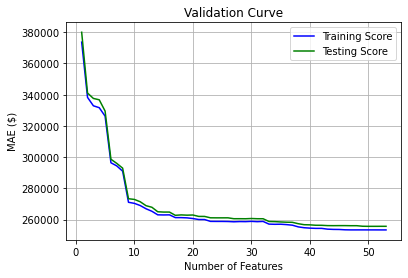

In [30]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

training = []
testing = []
ks = range(1, len(XX_train.columns)+1)

for k in range(1, len(XX_train.columns)+1):
#     print(f'{k} features')
#     new_no = {'no_features': k}
#     validation.append(new_no)
#     validation['no_features'][k] = k
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    XX_train_selected = selector.fit_transform(XX_train, yy_train)
    XX_test_selected = selector.transform(XX_test)
    
    all_names = XX_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
#     print('Selected names: ', selected_names)

    
    model = LinearRegression()
    model.fit(XX_train_selected, yy_train)
    yy_pred = model.predict(XX_train_selected)
    mae_train = mean_absolute_error(yy_train, yy_pred)
    training.append(mae_train)
    
#     validation['train_mae'][k] = mae
    
    yy_pred = model.predict(XX_test_selected)
    mae_test = mean_absolute_error(yy_test, yy_pred)
    r2 = r2_score(yy_test, yy_pred)
    testing.append(mae_test)
    
    new_data = {'no_features':k, 'train_mae':mae_train, 'test_mae':mae_test}
    validation = validation.append(new_data,ignore_index=True)
    
#     validation['test_mae'][k] = mae
    
#     print(f'Test MAE: ${mae:,.0f}')
#     print(f'Test R2: {r2} \n')
    
    
    
plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.grid()
plt.show()

In [31]:
validation['train_difference'] = 0
validation['test_difference'] = 0
for i in range(1,len(validation)):
    validation['train_difference'][i] = validation['train_mae'][i-1] - validation['train_mae'][i]
    validation['test_difference'][i] = validation['test_mae'][i-1] - validation['test_mae'][i]

<ipython-input-31-f3c587748a53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['train_difference'][i] = validation['train_mae'][i-1] - validation['train_mae'][i]
<ipython-input-31-f3c587748a53>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['test_difference'][i] = validation['test_mae'][i-1] - validation['test_mae'][i]


In [32]:
validation

,no_features,train_mae,test_mae,train_difference,test_difference
0,1.0,373659.596823,379996.508331,0,0
1,2.0,338264.813194,341050.825211,35394,38945
2,3.0,332886.208891,337588.052304,5378,3462
3,4.0,331666.410927,336729.565919,1219,858
4,5.0,326264.231291,329517.975179,5402,7211
5,6.0,296384.452703,298642.586873,29879,30875
6,7.0,294356.740621,295971.534135,2027,2671
7,8.0,290994.538810,292931.352140,3362,3040
8,9.0,271055.863677,273338.791275,19938,19592
9,10.0,270385.669711,272901.884857,670,436


### 14개의 특성 까지가 mae에 큰 변화를 준다고 판단됨. -> 특성은 14개까지만 쓰는 것으로 결정 

In [33]:
# 14개 특성으로 데이터 조정
selector2 = SelectKBest(score_func=f_regression, k=14)
XX_train_selected = selector2.fit_transform(XX_train, yy_train)
XX_test_selected = selector2.transform(XX_test)

all_names2 = XX_train.columns
selected_mask2 = selector2.get_support()
selected_names2 = all_names2[selected_mask2]

XX_train_final = XX_train[selected_names2]
XX_test_final = XX_test[selected_names2]

In [34]:
# 다항회귀

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def RidgeRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Ridge(**kwargs))

for alpha in [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    model = RidgeRegression(alpha=alpha, normalize=True)
    model.fit(XX_train_final, yy_train)
    yy_pred = model.predict(XX_test_final)

    # MAE for test
    mae = mean_absolute_error(yy_test, yy_pred)
    r2 = r2_score(yy_test, yy_pred)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridge"].coef_
print(f'Number of Features: {len(coefs)}')

Ridge Regression, alpha=0.001
Test MAE: $216,446
R2 Score: 0.6747

Ridge Regression, alpha=0.01
Test MAE: $218,117
R2 Score: 0.6698

Ridge Regression, alpha=0.05
Test MAE: $220,167
R2 Score: 0.6632

Ridge Regression, alpha=0.1
Test MAE: $221,966
R2 Score: 0.6583

Ridge Regression, alpha=0.5
Test MAE: $232,664
R2 Score: 0.6317

Ridge Regression, alpha=1.0
Test MAE: $240,564
R2 Score: 0.6100

Ridge Regression, alpha=10
Test MAE: $288,443
R2 Score: 0.4724

Number of Features: 680


### alpha값이 0.001일 때 가장 점수가 높고, alpha값 높을수록 점수 떨어짐. 
### 0.001 보다 더 낮춰보자

In [35]:
       
print(f'Ridge Regression, alpha=0')

# Ridge 모델 학습
model = RidgeRegression(alpha=0, normalize=True)
model.fit(XX_train_final, yy_train)
yy_pred = model.predict(XX_test_final)

# MAE for test
mae = mean_absolute_error(yy_test, yy_pred)
r2 = r2_score(yy_test, yy_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridge"].coef_
print(f'Number of Features: {len(coefs)}')

Ridge Regression, alpha=0
Test MAE: $577,758,166,951,950
R2 Score: -7,621,202,395,892,600,012,800.0000

Number of Features: 680


### 일단 alpha값 0일 땐 말이 안되는 점수...  
<br/>  
<br/>  

In [36]:
import numpy as np

def RidgeCVRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         RidgeCV(**kwargs))

alphas = np.arange(0.00001, 0.001, 0.0001)

model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(XX_train_final, yy_train)
yy_pred = model.predict(XX_test_final)

mae = mean_absolute_error(yy_test, yy_pred)
r2 = r2_score(yy_test, yy_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}') # best score: R2

Test MAE: $216,399
R2 Score: 0.6748

Number of Features: 680
alpha: 0.0009100000000000001
cv best score: 0.09023821984195131


### alpha값을 0.001 에서 낮춰보니 0.00091이 가장 높다, 하지만 cv score가 이상하다
<br/>
<br/>

In [37]:
alphas = np.arange(0.001, 0.2, 0.005)

model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(XX_train_final, yy_train)
yy_pred = model.predict(XX_test_final)

mae = mean_absolute_error(yy_test, yy_pred)
r2 = r2_score(yy_test, yy_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}') # best score: R2

Test MAE: $221,470
R2 Score: 0.6596

Number of Features: 680
alpha: 0.08600000000000001
cv best score: 0.6474911817851863


### 다시 0.001 ~ 0.2로 돌려본다, 0.086이 r2값은 낮은데 cv score는 높다

In [38]:
alphas = [0.086, 0.0001, 0.00091, 0.05, 0.1]

model = RidgeCVRegression(alphas= alphas, normalize=True, cv=5)
model.fit(XX_train_final, yy_train)
yy_pred = model.predict(XX_test_final)

mae = mean_absolute_error(yy_test, yy_pred)
r2 = r2_score(yy_test, yy_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}') # best score: R2

Test MAE: $221,470
R2 Score: 0.6596

Number of Features: 680
alpha: 0.086
cv best score: 0.6474911817851863


### 후보들을 정해서 다시 돌려본다.. 
### cv score가 일단 alpha값 0.086에서 가장 높게 나오는데, r2값은 0.00091이 더 높다. 뭔가 석연치 않다...

# 타입폼


### 1. 범주형 특성으로 원핫인코딩이 꼭 필요한 특성의 갯수를 제출하세요

In [39]:
len(categorical)

4

### 2. 분리된 학습데이터의 첫번째 샘플의 인덱스 값를 제출해 주세요.

In [41]:
X_train.index[0]

602

### 3. 가장 스코어(Attributes: scores_ 사용)가 높게 나온 특성의 이름을 제출하세요

In [43]:
selected_df.iloc[0,0]

'Rooms'

### 4. alphas = [0, 0.001, 0.01, 0.1, 1] 을 시도해보고 가장 좋은 점수가 나온 alpha 값을 제출하세요

In [44]:
ridge.alpha_

0.001

### 5. 테스트셋에 대한 MAE 값을 제출하세요

In [45]:
mae_cv_test

262857.3198109039

Ridge Regression, alpha=0.001
Test MAE: $216,446
Test R2: 0.675


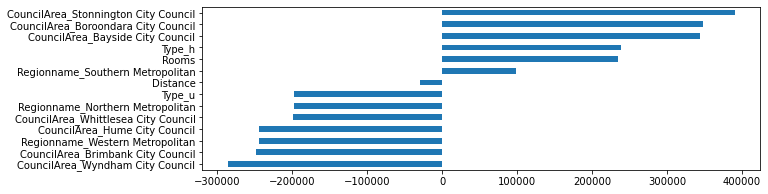

Ridge Regression, alpha=0.005
Test MAE: $216,446
Test R2: 0.675


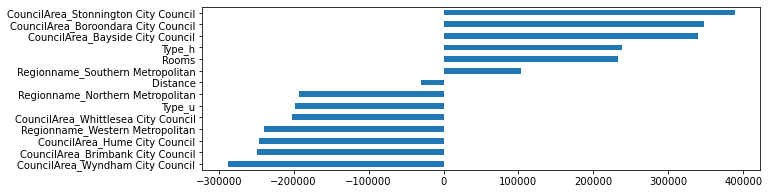

Ridge Regression, alpha=0.01
Test MAE: $216,446
Test R2: 0.675


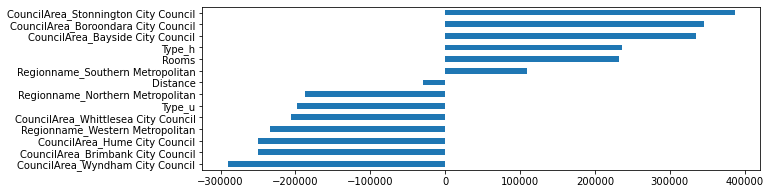

Ridge Regression, alpha=0.02
Test MAE: $216,446
Test R2: 0.675


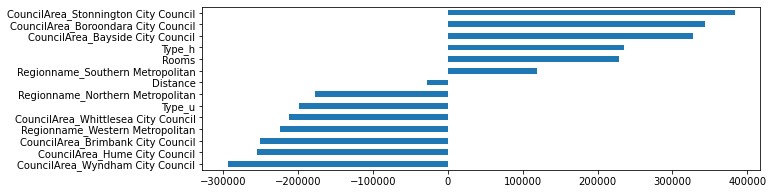

Ridge Regression, alpha=0.03
Test MAE: $216,446
Test R2: 0.675


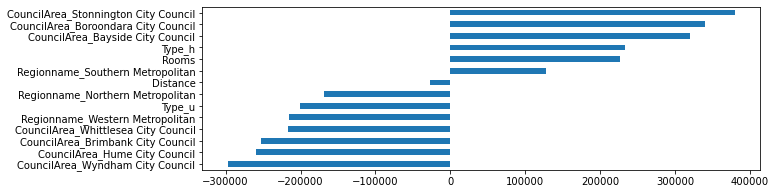

Ridge Regression, alpha=0.1
Test MAE: $216,446
Test R2: 0.675


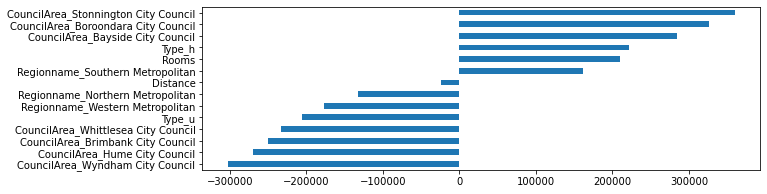

Ridge Regression, alpha=1.0
Test MAE: $216,446
Test R2: 0.675


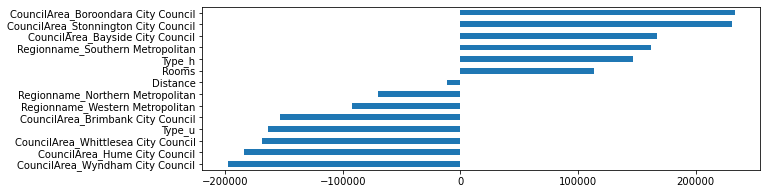

Ridge Regression, alpha=1
Test MAE: $216,446
Test R2: 0.675


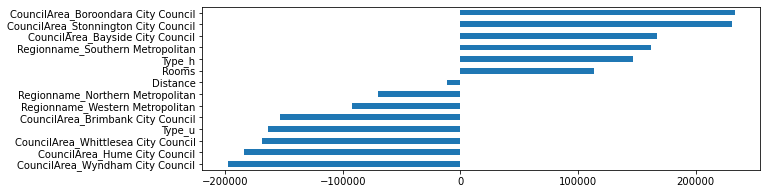

Ridge Regression, alpha=100.0
Test MAE: $216,446
Test R2: 0.675


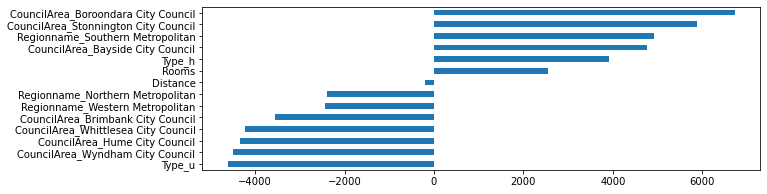

Ridge Regression, alpha=1000.0
Test MAE: $216,446
Test R2: 0.675


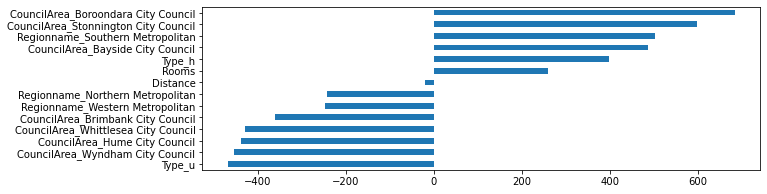

In [50]:
from sklearn.metrics import r2_score

for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1.0, 1, 100.0, 1000.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    model = Ridge(alpha=alpha, normalize=True)  
    model.fit(XX_train_final, yy_train)
    y_pred = model.predict(XX_test_final)

    # MAE for test
    mae = mean_absolute_error(yy_test, yy_pred)
    r2 = r2_score(yy_test, yy_pred)
    
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2:,.3f}')
    
    # plot coefficients
    coefficients = pd.Series(model.coef_, XX_train_final.columns)
    plt.figure(figsize=(10,3))
    coefficients.sort_values().plot.barh()
    plt.show()



